In [14]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator

% matplotlib notebook

In [15]:
def plot_style(xticks=5,yticks=5):
    
    global ax
    
    plt.rc('text', usetex=True)
    #plt.rcParams['mathtext.fontset'] = 'cm'
    #plt.rcParams['mathtext.rm'] = 'serif'
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5

    fig,ax = plt.subplots()
    x_minor_locator = AutoMinorLocator(xticks)
    y_minor_locator = AutoMinorLocator(yticks)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

    plt.rcParams['lines.linewidth'] = 1.0
    plt.rcParams['lines.dashed_pattern'] = [6, 6] 
    plt.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
    plt.rcParams['lines.dotted_pattern'] = [1, 3]
    plt.rcParams['lines.scale_dashes'] = False
    plt.rcParams['errorbar.capsize'] = 6

In [16]:
def exp_fit(x,b,tau,c):
    return c+b*np.exp(-x/tau)

In [17]:
data1 = np.loadtxt('relaxation curves.dat')
data2 = np.loadtxt('relaxation_curves_rho_acc_less_1e12.dat')
x = data1[:,0]

In [20]:
t1 = np.random.randint(low=365,high=1001,size=1000)
t2 = np.random.randint(low=100,high=501,size=1000)

print(np.mean(t1))
print(np.std(t1))
print(np.mean(t2))
print(np.std(t2))

num_arg6 = np.argmin(np.abs(data1[:,0]-10000))
num_arg7 = np.argmin(np.abs(data2[:,0]-10000))

popt_n = np.zeros((3,6,len(t1)))
popt2_n = np.zeros((3,8,len(t1)))
cov_n = np.zeros((3,3,6,len(t1)))
cov2_n = np.zeros((3,3,8,len(t1)))

popt = np.zeros((3,6))
popt2 = np.zeros((3,8))
cov = np.zeros((3,3,6))
cov2 = np.zeros((3,3,8))
cov_2 = np.zeros((3,3,8))
cov2_2 = np.zeros((3,3,8))

for i in range(1,7):
    for k in range(len(t1)):
        if(i%2==0):
            num_arg = np.argmin(np.abs(data1[:,0]-t1[k]))
            popt_n[:,i-1,k], cov_n[:,:,i-1,k] = optimize.curve_fit(exp_fit, x[num_arg:num_arg6], data1[num_arg:num_arg6,i],p0=[25,2*365,109.01])
        else:
            num_arg = np.argmin(np.abs(data1[:,0]-t1[k]))
            popt_n[:,i-1,k], cov_n[:,:,i-1,k] = optimize.curve_fit(exp_fit, x[num_arg:num_arg6], data1[num_arg:num_arg6,i],p0=[25,2*365,109.01])
       
    popt[0,i-1] = np.mean(popt_n[0,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    popt[1,i-1] = np.mean(popt_n[1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    popt[2,i-1] = np.mean(popt_n[2,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov[1,1,i-1] = np.var(popt_n[1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov_2[1,1,i-1] = np.mean(cov_n[1,1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
        
for i in range(1,9):
    for k in range(len(t1)):
        if(i%2==0):
            num_arg = np.argmin(np.abs(data2[:,0]-t2[k]))
            popt2_n[:,i-1,k], cov2_n[:,:,i-1,k] = optimize.curve_fit(exp_fit, x[num_arg:num_arg7], data2[num_arg:num_arg7,i],p0=[25,2*365,109.01])
        else:
            num_arg = np.argmin(np.abs(data2[:,0]-t2[k]))
            popt2_n[:,i-1,k], cov2_n[:,:,i-1,k] = optimize.curve_fit(exp_fit, x[num_arg:num_arg7], data2[num_arg:num_arg7,i],p0=[25,2*365,109.01])
    popt2[0,i-1] = np.mean(popt2_n[0,i-1,:][np.where(popt2_n[1,i-1,:]>150)])
    popt2[1,i-1] = np.mean(popt2_n[1,i-1,:][np.where(popt2_n[1,i-1,:]>150)])
    popt2[2,i-1] = np.mean(popt2_n[2,i-1,:][np.where(popt2_n[1,i-1,:]>150)])
    cov2[1,1,i-1] = np.var(popt2_n[1,i-1,:][np.where(popt2_n[1,i-1,:]>150)])
    cov2_2[1,1,i-1] = np.mean(cov2_n[1,1,i-1,:][np.where(popt2_n[1,i-1,:]>150)])
        
print(popt[1,:]/365)
print(popt2[1,:]/365)

print(cov[1,1,:])
print(cov_2[1,1,:])

print(cov2[1,1,:])
print(cov2_2[1,1,:])

689.701
184.734381204
299.664
115.33266278
[ 2.44965756  5.2833794   2.30953951  4.66237128  1.87488715  3.38073898]
[ 1.44617695  1.49847105  1.45583758  1.38028372  1.50543297  1.39089626
  1.60535382  1.52903463]
[  5708.51659843    273.79260172   4946.54794842   3120.61744393
    822.26129566  26248.14853636]
[ 13.07049714   7.35676891   9.20073663  17.01467299   0.70557694
  34.5999967    0.           0.        ]
[  3235.18766547  16308.49150078   2927.89435023  10939.55356256
   1978.58859683   8869.32201451    684.91941497   8637.950643  ]
[  1.83247263  16.49717786   1.71296688  11.9844286    1.31350148
  10.94763444   0.57387171  12.62906894]


<IPython.core.display.Javascript object>


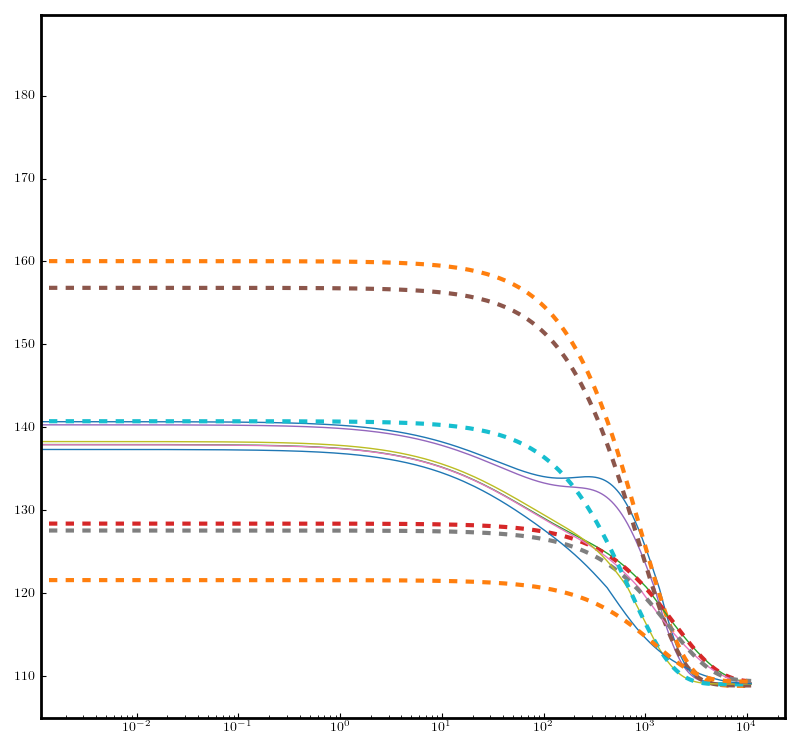

In [23]:
plt.figure(1)
plt.xscale('log')
for i in range(1,7,1):
    plt.plot(x,data1[:,i])
    plt.plot(x,exp_fit(x,*popt[:,i-1]),'--',lw=3)

<IPython.core.display.Javascript object>


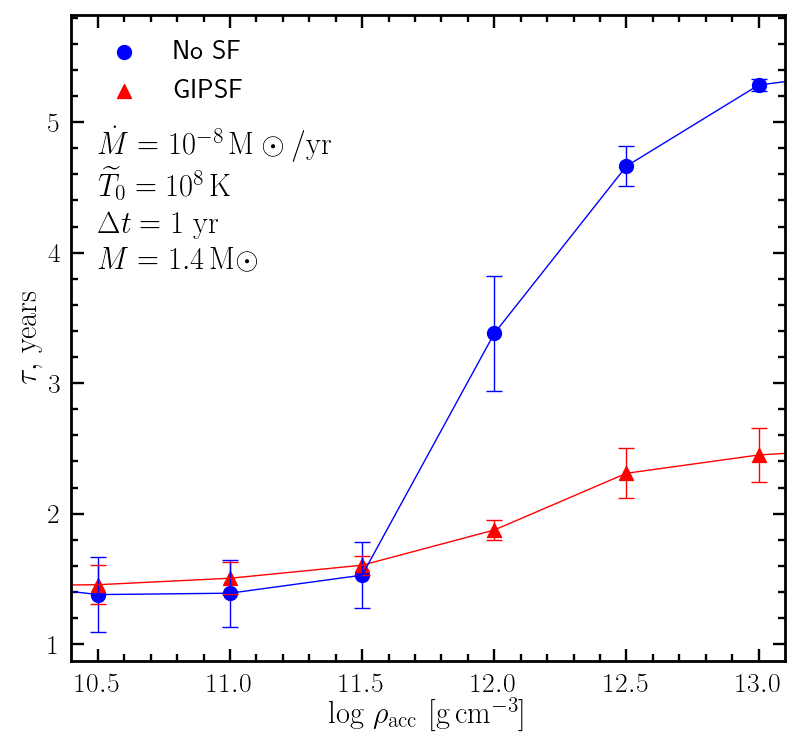

In [161]:
plot_style()
rho_array = [10,10.5,11,11.5,12,12.5,13]

t_array_SF = np.concatenate([popt2[1,::2],popt[1,::2][::-1]])/365
t_array_NO = np.concatenate([popt2[1,1::2],popt[1,1::2][::-1]])/365
error_SF = np.sqrt(np.concatenate([cov2[1,1,::2],cov[1,1,::2][::-1]]))/365
error_NO = np.sqrt(np.concatenate([cov2[1,1,1::2],cov[1,1,1::2][::-1]]))/365

plt.xlabel('$\\rm log$ $\\rho_{\\rm acc}$ $\\rm [ g \\thinspace cm^{-3}]$',fontsize=22)
plt.ylabel('$\\tau,$ $\\rm years$',fontsize=22)

rho_array = np.append(rho_array,14)
t_array_NO = np.append(t_array_NO,t_array_NO[-1]*1.05)
t_array_SF = np.append(t_array_SF,t_array_SF[-1]*1.05)
error_NO = np.append(error_NO,error_NO[-1]*1.05)
error_SF = np.append(error_SF,error_SF[-1]*1.05)

plt.errorbar(rho_array , t_array_SF, yerr=error_SF,color='red')
plt.errorbar(rho_array , t_array_NO, yerr=error_NO,color='blue')


plt.xticks([10,10.5,11,11.5,12,12.5,13],fontsize=20)
plt.yticks([1,2,3,4,5,6],fontsize=20)
plt.xlim(10.4,13.1)
plt.scatter(rho_array,t_array_NO,s=100,color='b',label='No SF')
plt.scatter(rho_array,t_array_SF,s=100,marker='^',color='r',label='GIPSF')

plt.text(10.50,4.75,'$\dot{M} = 10^{-8} \\thinspace \\rm M \\odot / yr$',fontsize=22)
plt.text(10.50,4.4,'$\widetilde{T}_{0} = 10^{8} \\thinspace \\rm K$',fontsize=22)
plt.text(10.50,4.15,'$\Delta t = 1 \\thinspace \\thinspace \\rm yr$',fontsize=22)
plt.text(10.50,3.87,'$M = 1.4 \\thinspace \\rm M \odot$',fontsize=22)
       

plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.savefig('fig_new.eps',format='eps')

<IPython.core.display.Javascript object>


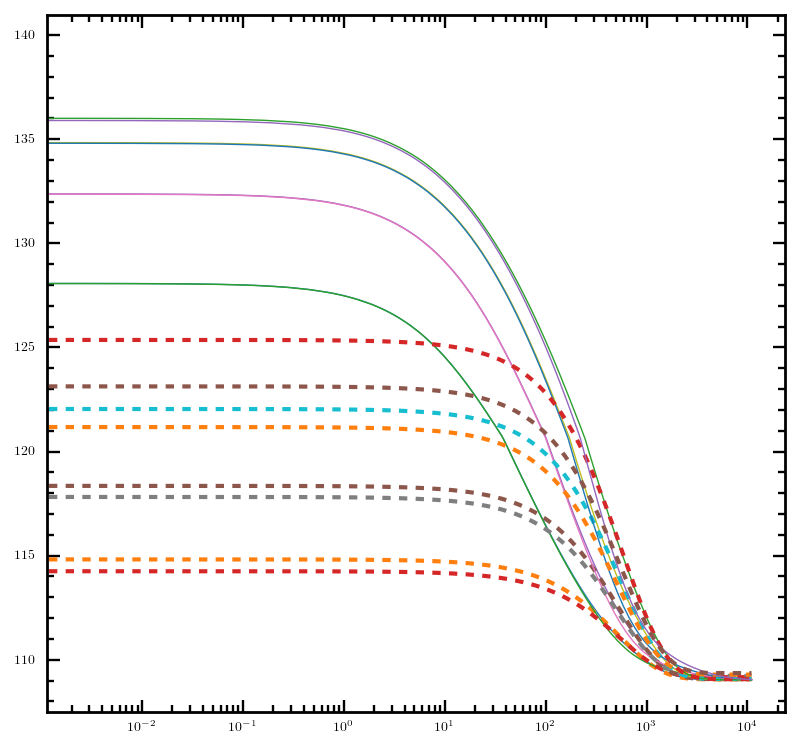

In [26]:
plot_style()
plt.xscale('log')
for i in range(1,9,1):
    plt.plot(x,data2[:,i])
    plt.plot(x,exp_fit(x,*popt2[:,i-1]),'--',lw=3)

In [123]:
data3 = np.loadtxt('IGR.dat')
x = data3[:,0]

t1 = np.random.randint(low=365,high=1001,size=1000)
print(np.mean(t1))
print(np.std(t1))

num_arg8 = np.argmin(np.abs(data3[:,0]-10000))
print(num_arg8)

popt_n = np.zeros((3,8,len(t1)))
cov_n = np.zeros((3,3,8,len(t1)))

cov3 = np.zeros([3,3,8])
cov3_2 = np.zeros([3,3,8])
popt3 = np.zeros([3,8])

for i in range(1,9):
    for k in range(len(t1)):
        num_arg = np.argmin(np.abs(data3[:,0]-t1[k]))
        popt_n[:,i-1,k], cov_n[:,:,i-1,k] = optimize.curve_fit(exp_fit, x[num_arg:num_arg8], data3[num_arg:num_arg8,i],p0=[40,365*0.5,84.3])
    popt3[0,i-1] = np.mean(popt_n[0,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    popt3[1,i-1] = np.mean(popt_n[1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    popt3[2,i-1] = np.mean(popt_n[2,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov3[1,1,i-1] = np.var(popt_n[1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov3_2[1,1,i-1] = np.mean(cov_n[1,1,i-1,:][np.where(popt_n[1,i-1,:]>150)])

print(popt3[1,:])
print(cov3[1,1,:])
print(cov3_2[1,1,:])

683.06
183.575053861
3096


/home/maryhallow/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


[ 238.67485593  563.10517569  233.46154387  617.43262261  232.17297564
  642.56992586  232.28696842  661.12644209]
[  1.10367338e+02   1.02192440e+04   1.91717392e+01   4.09624903e+03
   5.03987340e+00   1.57926542e+03   6.40912163e+00   9.18882514e+02]
[ 0.67180488  3.41244869  0.1875036   1.72128457  0.05790514  0.87383969
  0.04475987  0.54690976]


3.97738853301
0.0186873853326 None
1.34949651174
0.0215064471783 None
61.898661318
3.43689316055 None
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


<IPython.core.display.Javascript object>


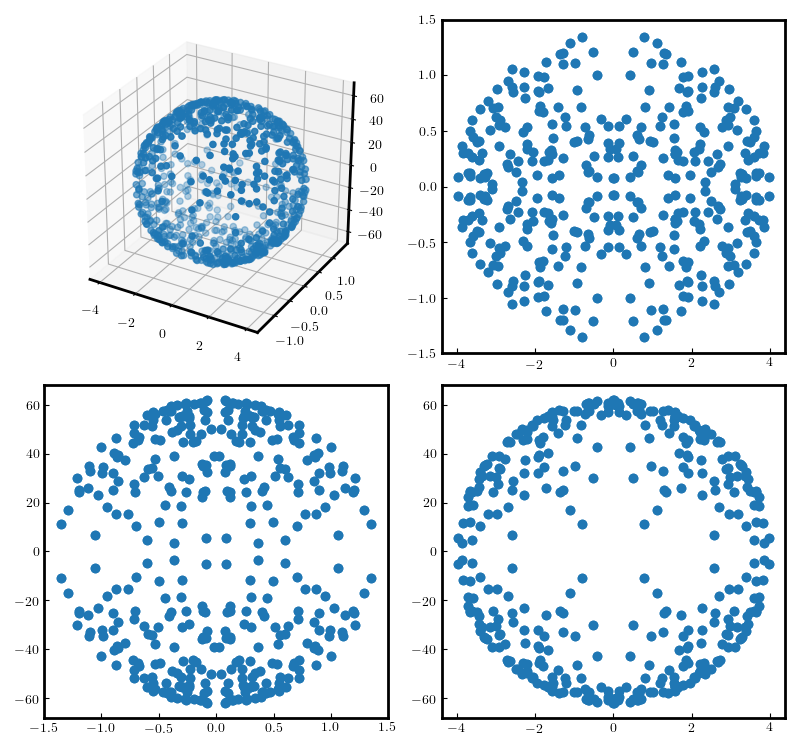

In [166]:
real_data = np.zeros([800,len(x[int(num_arg7/8):num_arg8][::2])])

a_m = 21.6
b_m = 84.3
tau_m = 157

delta_a = 4
delta_b = 1.4
delta_tau = 62
a = np.random.random(size=100)*delta_a
b = np.random.random(size=100)*delta_b*np.sqrt(1 - (a/delta_a)**2)
tau = delta_tau*np.sqrt(1  - (a/delta_a)**2  - (b/delta_b)**2)
print(np.min(a),print(np.max(a)))
print(np.min(b),print(np.max(b)))
print(np.min(tau),print(np.max(tau)))

print(a*a/delta_a/delta_a+b*b/delta_b/delta_b+tau*tau/delta_tau/delta_tau)
a = np.concatenate([  a, -a,  a,  a,     a,  -a,  -a,  -a  ])
b = np.concatenate([  b,  b, -b,  b,    -b,  -b,   b,  -b  ])
tau = np.concatenate([tau,tau,tau,-tau,-tau, tau, -tau,-tau])

fig = plt.figure()

ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(a,b,tau)
ax2 = fig.add_subplot(222)
ax2.scatter(a,b)
ax3 = fig.add_subplot(223)
ax3.scatter(b,tau)
ax4 = fig.add_subplot(224)
ax4.scatter(a,tau)

for i in range(800):
    real_data[i,:] = exp_fit(x[int(num_arg7/8):num_arg8][::2],a_m + a[i],tau_m + tau[i],b_m + b[i])
       
real_data_max = np.max(real_data,axis=0)
real_data_min = np.min(real_data,axis=0)
        

In [167]:
def f_IGR(x):
    return 84.3+21.6*np.exp(-x/157)

def plot2(): 
    plot_style()
    k_b = 8.617330350e-5
    config = np.loadtxt('data/config.dat')
     
    plt.fill_between(x[int(num_arg7/8):num_arg8][::2]/365,real_data_min,real_data_max,color='lightgray')
        
    for idx,lb in zip([3,0],['$\\rho_{\\rm acc} = 10^{13} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$',
    '$\\rho_{\\rm acc} = 10^{11.5} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$',
                              '$\\rho_{\\rm acc} = 10^{11.5} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$']):
 
        data1 = np.loadtxt('output/cooling_GIPSF_' + str(idx+35) + '.dat')
        data2 = np.loadtxt('output/cooling_SF0_' + str(idx+35) + '.dat')

        plt.plot((data1[:, 1]-1.000170e3), data1[:, 0]*k_b, color=colors2[idx],
             linewidth=line_thickness2[idx],zorder=order2[idx],label=lb)
        plt.plot((data2[:, 1]-1.000170e3), data2[:, 0]*k_b, '--',color=colors2[idx],
             linewidth=line_thickness2[idx],zorder=order2[idx])
        
    plt.scatter(t_IGR/365, T_IGR, s=100, color='black', marker='^',label='IGR J17480--2446', zorder=6)
    plt.errorbar(x=t_IGR/365, y=T_IGR, yerr=err_IGR, color='black', fmt=' ',zorder=6)

        
    plt.plot([10,10],[20,20],color='black',lw=5,label='GIPSF model')
    plt.plot([10,10],[20,20],'--',color='black',lw=5,label='No SF')
    
  
    plt.xscale('log')
    plt.xticks([0.01, 0.1, 1,10,100,1000,10000], fontsize=20)
    
    for i,lb,c in zip(range(7,9,1),['Best fit GIPSF','Best fit No SF'],['crimson','orange']):
        print(*popt3[:,i-1])
        #plt.plot(x,data3[:,i])
        plt.plot(x/365,exp_fit(x,*popt3[:,i-1]),dashes=[10,4,3,4],lw=3
                ,label=lb,zorder=5,color=c)

    plt.text(0.015, 85,'$\dot{M} = 3.17\\times 10^{-9} \\thinspace \\rm M \\odot / yr$',fontsize=22)
    plt.text(0.015, 83,'$kT_{\\rm s 0}^{\infty} = 83 \\thinspace \\thinspace \\rm eV$',fontsize=22)
    plt.text(0.015, 81.5,'$\Delta t = 0.17 \\thinspace \\thinspace \\rm yr$',fontsize=22)
       
    plt.plot(x[int(num_arg7/8):num_arg8]/365,f_IGR(x[int(num_arg7/8):num_arg8]),label='Degenaar et al. (2013)',lw=2,c='black',dashes=[3,6],zorder=7)
  
    plt.yticks(np.array([90,100,110,120,130,140,150,160,170,180])-30, fontsize=20)
    plt.xlabel('$\\rm Years \\thinspace  \\thinspace  since  \\thinspace  \\thinspace  '
               'onset \\thinspace  \\thinspace  of  \\thinspace  \\thinspace quiescence$',fontsize=22)
    plt.ylabel('$kT^{\infty}_{\\rm s}$ $\\rm (eV)$',fontsize=22)
    plt.legend(loc='upper right',fontsize=17,scatterpoints=1,frameon=False)
    fixlogax(plt.gca(), a='x')
    plt.xlim(0.01,10)
    plt.ylim(80,110)
    plt.savefig('best_fit.eps',format='eps')
    plt.savefig('best_fit.jpg',format='jpg')
    plt.show()
    
def fixlogax(ax, a='x'):
    if a == 'x':
        labels = [item.get_text() for item in ax.get_xticklabels()]
        positions = ax.get_xticks()
        # print positions
        # print labels
        for i in range(len(positions)):
            labels[i] = '$10^{'+str(int(np.log10(positions[i])))+'}$'
        if np.size(np.where(positions == 1)) > 0:
            labels[np.where(positions == 1)[0][0]] = '$1$'
        if np.size(np.where(positions == 10)) > 0:
            labels[np.where(positions == 10)[0][0]] = '$10$'
        if np.size(np.where(positions == 0.1)) > 0:
            labels[np.where(positions == 0.1)[0][0]] = '$0.1$'
        # print positions
        # print labels
        ax.set_xticklabels(labels)
    if a == 'y':
        labels = [item.get_text() for item in ax.get_yticklabels()]
        positions = ax.get_yticks()
        # print positions
        # print labels
        for i in range(len(positions)):
            labels[i] = '$10^{'+str(int(np.log10(positions[i])))+'}$'
        if np.size(np.where(positions == 1)) > 0:
            labels[np.where(positions == 1)[0][0]] = '$1$'
        if np.size(np.where(positions == 10)) > 0:
            labels[np.where(positions == 10)[0][0]] = '$10$'
        if np.size(np.where(positions == 0.1)) > 0:
            labels[np.where(positions == 0.1)[0][0]] = '$0.1$'
        # print positions
        # print labels
        ax.set_yticklabels(labels)


<IPython.core.display.Javascript object>


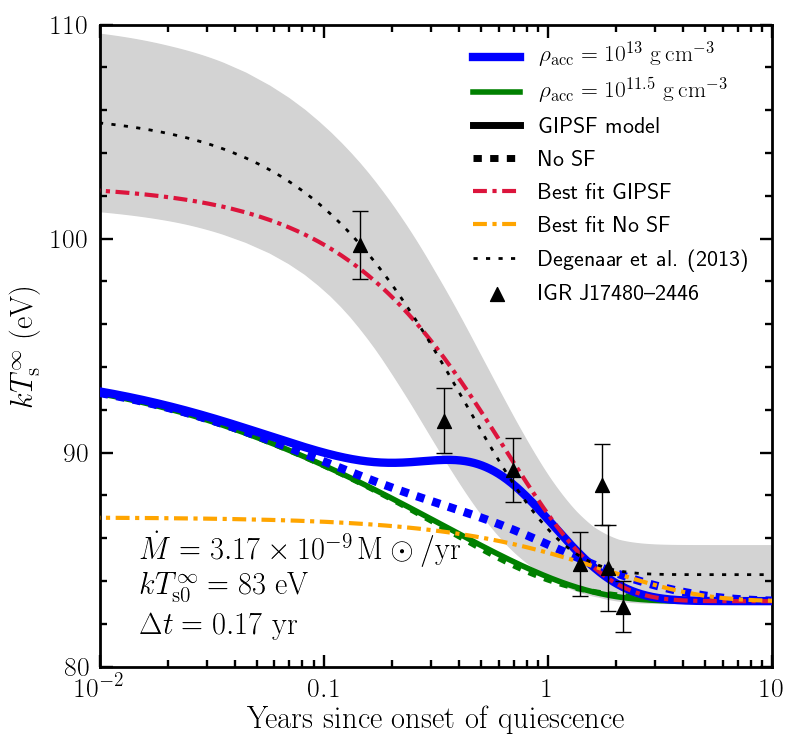

19.4829171282 232.286968415 83.061049024
3.91475149272 661.126442088 83.0657955355


In [168]:
T_IGR = np.array([99.7, 91.5, 89.2, 84.8, 88.5, 84.6, 82.8])
t_IGR = np.array([55609, 55680.5, 55810.5, 56060, 56187.5, 56228, 56340]) - 55556
err_IGR = np.array([1.6, 1.5, 1.5, 1.5, 1.9, 2.0, 1.2])

names = np.array(['SF0','AWP2', 'GIPSF', 'SCLBL'])
labels = np.array(['No SF','AWP2', 'GIPSF', 'SCLBL'])
colors = np.array(['black','darkblue','red','darkorange'])
shape = np.array(['s','^','o','d'])
line_thickness = np.array([4.8, 2.7,2.2,3.2])
dashes = np.array([[2,1e-15],[4,8],[20,3],[9,6]])
order = np.array([1,4,2,3])

order2 = np.array([1,2,3,4])
colors2 = np.array(['green','orange','red','blue'])
dashes2 = np.array([[2,1e-15],[7,1],[3,2],[1.5,3]])
line_thickness2 = np.array([2,3,2.5,3])*2

plot2()

<IPython.core.display.Javascript object>


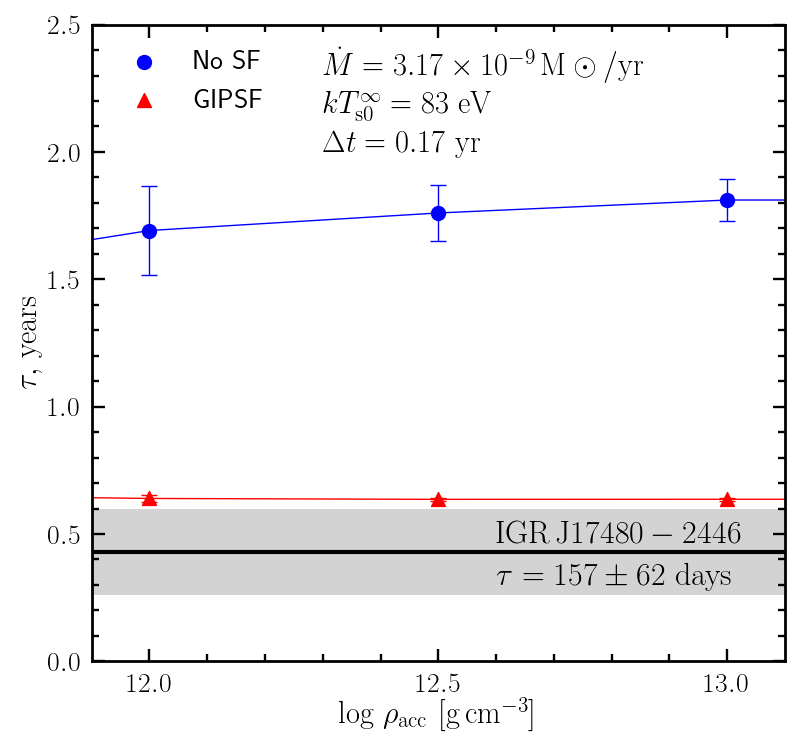

In [160]:
density = np.array([11.5,12,12.5,13,14])
plot_style()

plt.scatter(density,np.append(popt3[1,1::2],popt3[1,1::2][-1])/365,s=100,color='b',label='No SF')
plt.scatter(density,np.append(popt3[1,::2],popt3[1,::2][-1])/365,s=100,marker='^',color='r',label='GIPSF')

error_NO = np.sqrt(cov3[1,1,1::2])/365
error_SF = np.sqrt(cov3[1,1,::2])/365

error_NO = np.append(error_NO,error_NO[-1])
error_SF = np.append(error_SF,error_SF[-1])
 
plt.errorbar(density , np.append(popt3[1,::2],popt3[1,::2][-1])/365, yerr=error_SF,color='red')
plt.errorbar(density , np.append(popt3[1,1::2],popt3[1,1::2][-1])/365*np.array([0.98,1,1,1,1]), yerr=error_NO,color='blue')

plt.yticks([0,0.5,1,1.5,2,2.5],fontsize=20)
plt.xticks([12,12.5,13],fontsize=20)

plt.plt.fill_between([10,12,14], np.array([95,95,95])/365, np.array([219,219,219])/365, facecolor='lightgray', interpolate=True, alpha=1)
plt.axhline(y=157/365,linewidth=3, color = 'k')
plt.text(12.6,0.47,'$\\rm IGR\\thinspace J17480-2446$',fontsize=23)
plt.text(12.6,0.3,'$\\rm \\tau = 157 \pm 62 \\thinspace \\thinspace days$',fontsize=23)

plt.text(12.3,2.3,'$\dot{M} = 3.17\\times 10^{-9} \\thinspace \\rm M \\odot / yr$',fontsize=22)
plt.text(12.3,2.12,'$kT_{\\rm s 0}^{\infty} = 83 \\thinspace \\thinspace \\rm eV$',fontsize=22)
plt.text(12.3,2.0,'$\Delta t = 0.17 \\thinspace \\thinspace \\rm yr$',fontsize=22)
    
plt.xlim(11.9,13.1)
plt.ylim(0,2.5)

plt.xlabel('$\\rm log$ $\\rho_{\\rm acc}$ $\\rm [ g \\thinspace cm^{-3}]$',fontsize=22)
plt.ylabel('$\\tau,$ $\\rm years$',fontsize=22)

plt.legend(loc='upper left',fontsize=20,frameon=False)

plt.savefig('IGR.eps',format='eps')

<IPython.core.display.Javascript object>


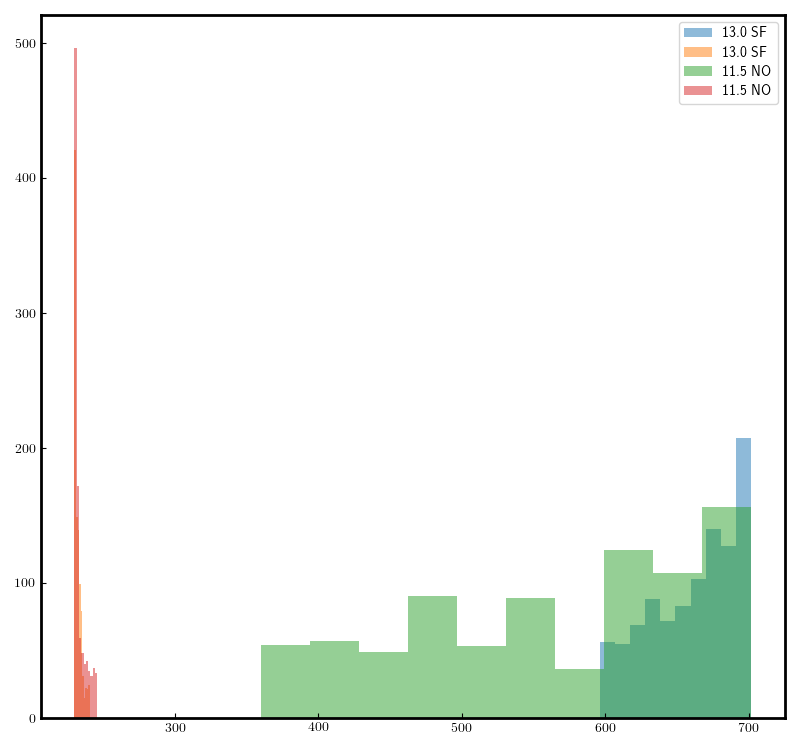

In [157]:
plt.figure(40)
plt.hist(popt_n[1,7,:][np.where(popt_n[1,7,:]>150)],alpha=0.5,label='13.0 SF')
plt.hist(popt_n[1,6,:][np.where(popt_n[1,6,:]>150)],alpha=0.5,label='13.0 SF')
plt.hist(popt_n[1,1,:][np.where(popt_n[1,1,:]>150)],alpha=0.5,label='11.5 NO')
plt.hist(popt_n[1,2,:][np.where(popt_n[1,2,:]>150)],alpha=0.5,label='11.5 NO')

plt.legend()